# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm 

In [117]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [118]:
athletes = pd.read_csv("athletes.csv")

In [119]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [120]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [121]:
athletes.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [122]:
alpha = 0.05
amostra_height = get_sample(athletes, 'height',n=3000, seed=42)

In [123]:
def q1():
    # Retorne aqui o resultado da questão 1.
    stat, p = sct.shapiro(amostra_height)
    return p>alpha       

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

### Análise:

    - O teste de Shapiro-Wilk nos leva a rejeitar a hipótese nula, ou seja, a partir deste teste, a variável não tem distribuição normal. O resultado deste teste é confirmado quando calculamos a Média, Mediana e moda da nossa variável. Além disso, veremos pelo qq-plot, ou pelo histograma, que nossa variável aparenta ter uma distribuição normal, mas isso não significa que ela seja, como visto anteriormente.
    
    - Se reduzirmos nosso nível de significância para 0.00005% a hipótese nula não será rejeitada pelo teste de Shapiro-Wilk. Desta forma, de acordo com o teste, a amostra teria uma distribuição normal.



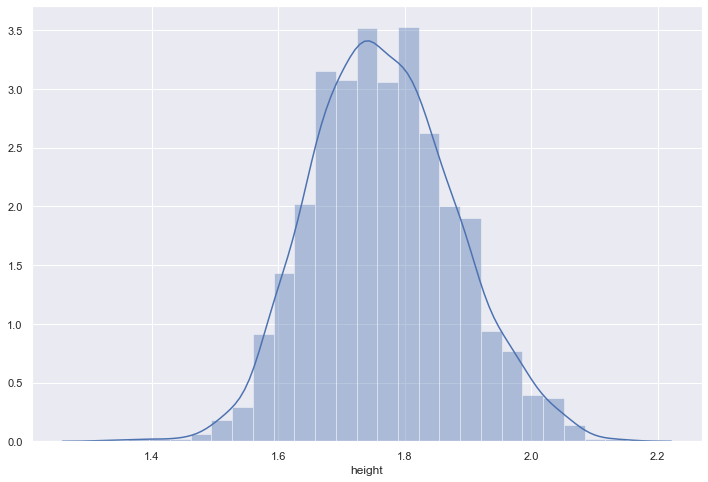

In [124]:
sns.distplot(amostra_height,bins=25)

In [125]:
print('Média: {:.2f}, Mediana: {:.2f}, Moda: {}'.format(amostra_height.mean(), amostra_height.median(), amostra_height.mode()))

Média: 1.77, Mediana: 1.76, Moda: 0    1.8
dtype: float64


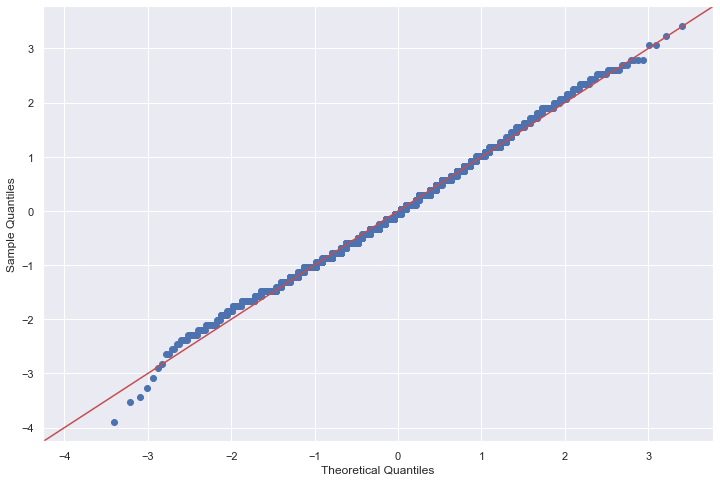

In [126]:
sm.qqplot(amostra_height, fit=True, line="45");

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [127]:
def q2():
    # Retorne aqui o resultado da questão 2.
    jb_value, p = sct.jarque_bera(amostra_height)
    if p>alpha:
        return True
    else:
        return False

__Para refletir__:

* Esse resultado faz sentido?

### Análise:

- O resultado faz todo sentido, tendo em mente os valores do skewness e kurtosis

In [128]:
print("Kurtosis: ",sct.kurtosis(amostra_height))
print("Skewness: ",sct.skew(amostra_height))

Kurtosis:  -0.046799141975459424
Skewness:  0.15974896040186146


## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [129]:
amostra_weight = get_sample(athletes, 'weight',n=3000, seed=42)

In [130]:
def q3():
    # Retorne aqui o resultado da questão 3.
    jb_value, p = sct.normaltest(amostra_weight)
    if p>alpha:
        return True
    else:
        return False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

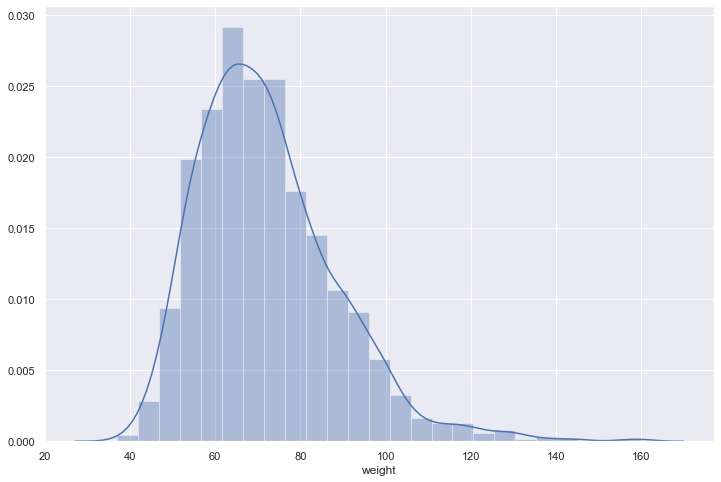

In [131]:
sns.distplot(amostra_weight,bins=25);

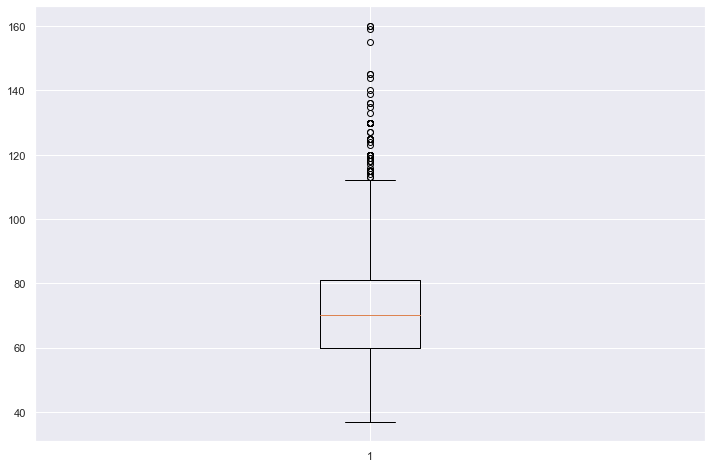

In [132]:
plt.boxplot(amostra_weight);

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [133]:
def q4():
    # Retorne aqui o resultado da questão 4.
    amostra_weight_log = np.log(amostra_weight)
    jb_value, p = sct.normaltest(amostra_weight_log)
    if p>alpha:
        return True
    else:
        return False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [134]:
usa = athletes.loc[athletes.nationality == 'USA'].height
bra = athletes.loc[athletes.nationality == 'BRA'].height
can = athletes.loc[athletes.nationality == 'CAN'].height

In [135]:
def q5():
    # Retorne aqui o resultado da questão 5.
    # equal_var
    #If True (default), perform a standard independent 2 sample test that assumes equal population variances. 
    #If False, perform Welch’s t-test, which does not assume equal population variance.
    t_stat, p = sct.ttest_ind(bra,usa, equal_var= False, nan_policy= 'omit')
    if p>alpha:
        return True
    else:
        return False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [136]:
def q6():
    # Retorne aqui o resultado da questão 6.
    # equal_var
    #If True (default), perform a standard independent 2 sample test that assumes equal population variances. 
    #If False, perform Welch’s t-test, which does not assume equal population variance.
    t_stat, p = sct.ttest_ind(bra,can, equal_var= False, nan_policy= 'omit')
    if p>alpha:
        return True
    else:
        return False

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [137]:
def q7():
    # Retorne aqui o resultado da questão 7.
    # equal_var
    #If True (default), perform a standard independent 2 sample test that assumes equal population variances. 
    #If False, perform Welch’s t-test, which does not assume equal population variance.
    t_stat, p = sct.ttest_ind(usa,can, equal_var= False, nan_policy= 'omit')
    return float(round(p,8))

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

### Análise

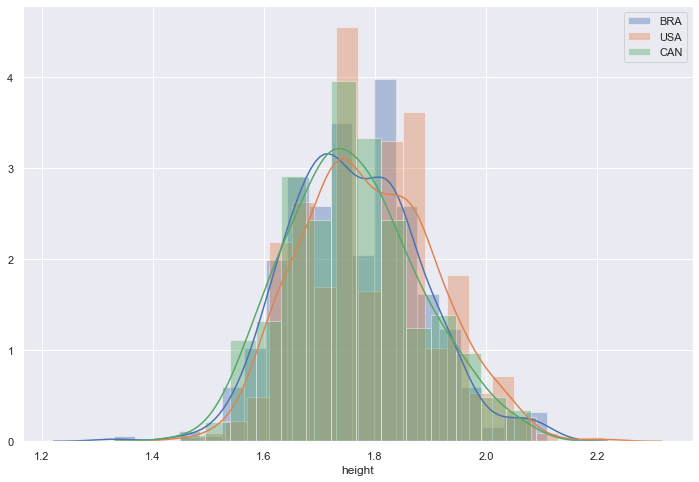

In [138]:
#Histograma das alturas Brasileiras e Norte-Americanas
sns.distplot(bra.dropna(), label='BRA')
sns.distplot(usa.dropna(), label='USA')
sns.distplot(can.dropna(), label='CAN')

plt.legend()

In [139]:
print('Média da altura USA =', usa.mean() )
print('Média da altura CAN =', can.mean() )
print('Média da altura BRA =', bra.mean() )

Média da altura USA = 1.7877678571428557
Média da altura CAN = 1.7585937500000004
Média da altura BRA = 1.764033613445379


- O resultado faz sentido, pois analisando a curva de distribuição e as médias entre as alturas dos atletas, imaginariamos que os atletas canadenses e brasileiros são estatisticamente iguais. Isso é confirmado pelo teste t.

- Pode se chegar ao p valor a partir da tabela de t student